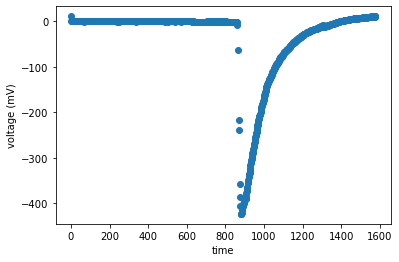

In [46]:
import matplotlib.pyplot as plt
import pylab
import numpy as np


with open("nearLEDdata.txt") as f:
    events = f.read().split('-- Event')


lines = events[449].split('\n')
time = []
voltage = []
for line in lines[4:1028]:
        
    values = line.split()
    time.append(float(values[2]))
    voltage.append(float(values[3]))
    
plt.scatter(time,voltage)
plt.xlabel('time')
plt.ylabel('voltage (mV)')
plt.show()
    


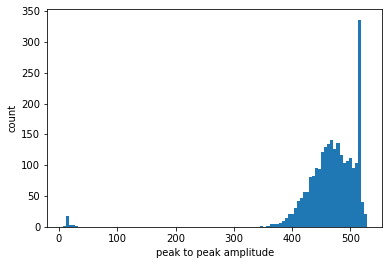

Average:
466.0634562029324
57.38484766420038
2523


In [51]:
with open("nearLEDdata.txt") as f:
    events = f.read().split('-- Event')

peaktopeak = []    
    
for event in events:
    lines = event.split('\n')
    maxvoltage = -100000;
    minvoltage = 100000;

    for line in lines[4:1028]:
        values = line.split()
        

        if float(values[3]) < minvoltage:
            minvoltage = float(values[3])
        if float(values[3]) > maxvoltage:
            maxvoltage = float(values[3])
    if maxvoltage - minvoltage > 0 and maxvoltage - minvoltage < 10000:
        peaktopeak.append(maxvoltage - minvoltage)
    #if maxvoltage - minvoltage > 540:
     #   print(events.index(event))
plt.hist(peaktopeak, 100)
plt.xlabel('peak to peak amplitude')
plt.ylabel('count')
plt.show()
plt.show()
print("Average:")
print(sum(peaktopeak) / len(peaktopeak))
print(np.std(peaktopeak))
print(len(peaktopeak))

ValueError: operands could not be broadcast together with shapes (150,) (15,) 

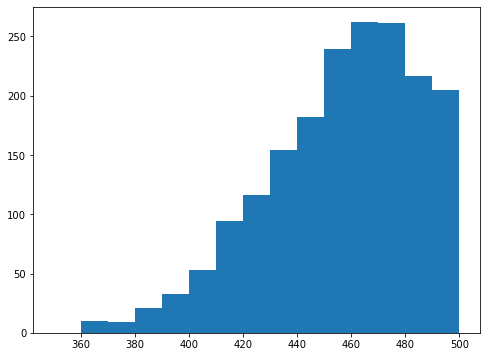

In [56]:
from scipy.optimize import curve_fit
def gaussian(x, amp, mean, sigma):
    return amp * np.exp( -(x - mean)**2 / (2*sigma**2) ) 
fig = plt.figure( figsize=(8, 6), facecolor='w')
hist_data, bins, patches = plt.hist(peaktopeak, bins=15, range=[350, 500])
x = np.linspace(bins[1], bins[-1], 500 - 350)
y = hist_data
popt, pcov = curve_fit(gaussian, x, y, p0=(37.975, 471.53, 37.158))
resolution = peaktopeak
y = gaussian(x, *popt)
plt.plot(x, y, color='r')
plt.xlabel('Peak to Peak Amplitude (GeV)')
plt.ylabel('Entries')
plt.errorbar(x,y,yerr=np.sqrt(y))

In [45]:
y

array([ 0.13309198,  0.14518023,  0.15825148,  0.1723744 ,  0.18762143,
        0.20406889,  0.2217971 ,  0.24089047,  0.26143761,  0.28353142,
        0.3072692 ,  0.33275267,  0.36008809,  0.38938629,  0.42076271,
        0.45433745,  0.49023522,  0.52858542,  0.56952204,  0.61318368,
        0.65971344,  0.70925885,  0.76197179,  0.8180083 ,  0.87752848,
        0.94069626,  1.00767924,  1.07864838,  1.15377778,  1.23324436,
        1.31722752,  1.40590879,  1.4994714 ,  1.59809988,  1.70197958,
        1.81129614,  1.92623499,  2.04698079,  2.17371678,  2.30662418,
        2.44588152,  2.59166391,  2.74414236,  2.90348299,  3.06984626,
        3.24338615,  3.42424935,  3.61257437,  3.80849073,  4.01211804,
        4.22356508,  4.44292899,  4.67029426,  4.90573189,  5.14929846,
        5.40103526,  5.66096737,  5.92910283,  6.20543176,  6.4899256 ,
        6.78253624,  7.08319536,  7.39181363,  7.70828011,  8.03246163,
        8.36420219,  8.70332252,  9.04961959,  9.40286631,  9.76

In [25]:
pcov

array([[ 0.64938354, -0.16767784, -0.606743  ],
       [-0.16767784,  2.38330941,  1.60760866],
       [-0.606743  ,  1.60760866,  2.41846645]])

In [35]:
len(y)

100

In [36]:
len(x)

100